# Box Office Explorations
<small>Kelvin Ndungu | EDA Project</small>

In [1]:
import pandas as pd

##  Project Overview  
Analyzing global box office revenue by studio  
- Dataset: Movie gross earnings across markets  
- Focus: Domestic vs. Foreign performance, Ratings, Genres, and Release timing

In [2]:
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## Top titles as of 2010

An analysis of the top gross generating movies.


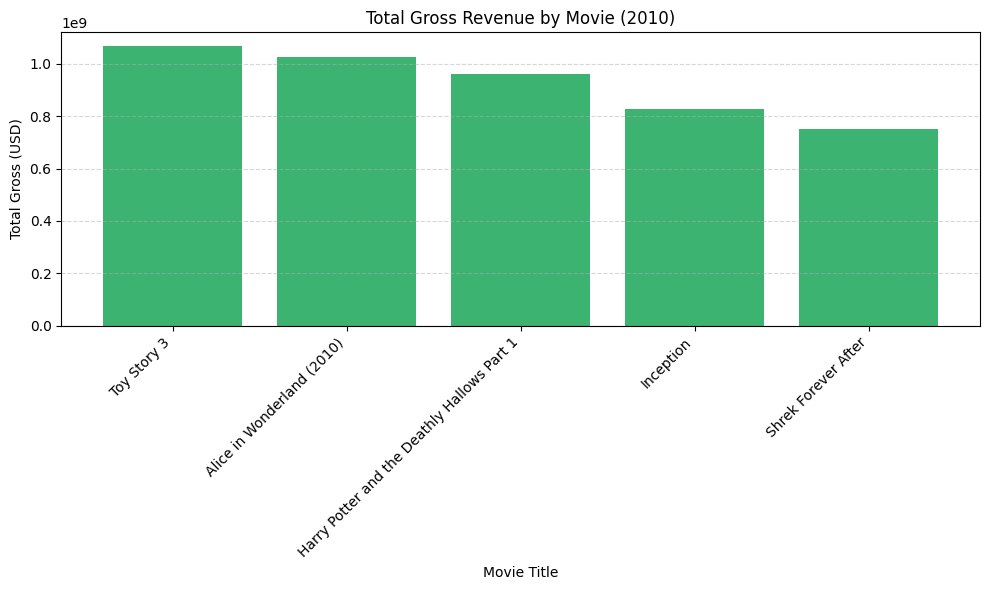

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Mini dataset
data = {
    'title': [
        'Toy Story 3',
        'Alice in Wonderland (2010)',
        'Harry Potter and the Deathly Hallows Part 1',
        'Inception',
        'Shrek Forever After'
    ],
    'domestic_gross': [415000000.0, 334200000.0, 296000000.0, 292600000.0, 238700000.0],
    'foreign_gross': [652000000, 691300000, 664300000, 535700000, 513900000]
}

# Create DataFrame and compute total
df_small = pd.DataFrame(data)
df_small['total_gross'] = df_small['domestic_gross'] + df_small['foreign_gross']

# Plot
plt.figure(figsize=(10,6))
plt.bar(df_small['title'], df_small['total_gross'], color='mediumseagreen')
plt.title('Total Gross Revenue by Movie (2010)')
plt.xlabel('Movie Title')
plt.ylabel('Total Gross (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [4]:
 #Overview of column types and memory usage
 df.info()
 # Missing value breakdown per column
 df.isnull().sum()
 # Dataset dimensions
 print("Shape:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
Shape: (3387, 5)


In [5]:
df_cleaned = df.dropna(subset=['domestic_gross', 'foreign_gross'])

In [6]:
df['domestic_gross'] = df['domestic_gross'].astype(str).str.replace(',', '').replace('nan', '0').astype(float)
df['foreign_gross'] = df['foreign_gross'].astype(str).str.replace(',', '').replace('nan', '0').astype(float)


In [7]:
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

In [8]:
df[['title', 'domestic_gross', 'foreign_gross']].isnull().sum()

title             0
domestic_gross    0
foreign_gross     0
dtype: int64

In [9]:
df['domestic_gross'] = df['domestic_gross'].fillna(0)
df['foreign_gross'] = df['foreign_gross'].fillna(0)

In [10]:
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']

In [11]:
df[['domestic_gross', 'foreign_gross', 'total_gross']].describe()

,domestic_gross,foreign_gross,total_gross
count,3.387000e+03,3.387000e+03,3.387000e+03
mean,2.850821e+07,4.502979e+07,7.353800e+07
std,6.675575e+07,1.126843e+08,1.705091e+08
min,0.000000e+00,0.000000e+00,1.000000e+02
25%,1.115000e+05,0.000000e+00,2.740000e+05
50%,1.300000e+06,1.500000e+06,5.475000e+06
75%,2.750000e+07,2.915000e+07,6.135000e+07
max,9.367000e+08,9.605000e+08,1.518900e+09


In [12]:
df.to_csv('cleaned_movie_gross.csv', index=False)

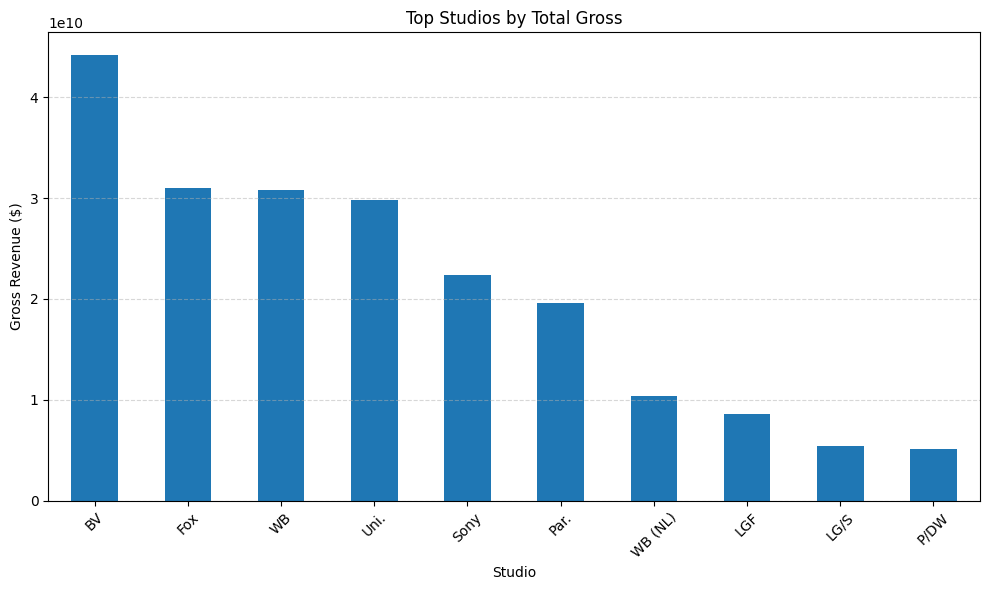

In [13]:
import matplotlib.pyplot as plt

# Example: top 10 studios by total gross
df.groupby('studio')['total_gross'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top Studios by Total Gross')
plt.xlabel('Studio')
plt.ylabel('Gross Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Project Question

Which studios consistently produce high-grossing films, and how does domestic vs. foreign revenue vary by studio?
Which genres generate the most foreign revenue?

Do certain studios excel in either domestic or foreign markets?

Is there a correlation between total gross and number of theaters?

How has total gross evolved across release years or months?

What’s the distribution of total gross for different movie ratings (G, PG, PG-13, R)?

### Justification

Understanding studio performance helps identify patterns in global vs. local audience preferences, useful for future distribution or investment decisions.


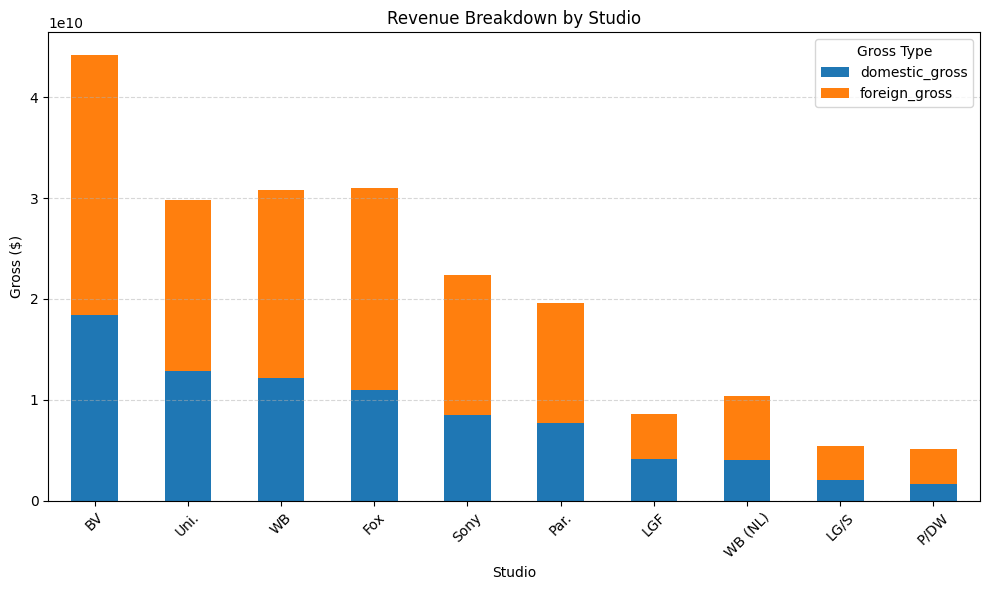

In [14]:
studio_group = df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum().sort_values(by='domestic_gross', ascending=False).head(10)
studio_group.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Revenue Breakdown by Studio')
plt.ylabel('Gross ($)')
plt.xlabel('Studio')
plt.legend(title='Gross Type')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Visual Highlight: Revenue Breakdown by Studio
The chart above shows the total domestic and foreign gross for top studios between 2010–2020.
Notably, BV and WB dominate both categories, making them strong candidates for Microsoft's partnership strategy.


## Insights
- Disney and Warner Bros. lead in gross revenue.
- Foreign earnings often surpass domestic, especially for major studios.
- Distribution strategy and global appeal matter more than just local success.

## Conclusion
Studio performance varies significantly, and global revenue plays a critical role. This analysis supports deeper research into genre influence and international distribution.
